# Метод Штрассена Кротов Илья Павлович 381908-2 Вариант 17
Реализация метода   Штрассена:
<img src="Strassen.jpg">

In [1]:
import numpy as np
import time
import random
import matplotlib.pyplot as plt
import math

In [2]:
def strassen(A,B):
    n = len(A)
    C = np.zeros((n*n), dtype=np.float32).reshape(n,n)
    if n == 1:
        C[0][0] = A[0][0] * B[0][0]
    else:
        k = n//2
        
        a11 = A[:k,:k]
        a21 = A[k:,:k]
        a12 = A[:k,k:]
        a22 = A[k:,k:]
        
        b11 = B[:k,:k]
        b21 = B[k:,:k]
        b12 = B[:k,k:]
        b22 = B[k:,k:]

        d1 = strassen(a11+a22,b11+b22)
        d2 = strassen(a12-a22,b21+b22)
        d3 = strassen(a11-a21,b11+b12)
        d4 = strassen(a11+a12,b22)
        d5 = strassen(a21+a22,b11)
        d6 = strassen(a11,b12-b22)
        d7 = strassen(a22,b21-b11)

        C[:k,:k] = d1+d2-d4+d7
        C[:k, k:] = d4+d6
        C[k:, :k] = d5+d7
        C[k:, k:] = d1-d3-d5+d6

    return C

In [3]:
def UsualMult(A, B):
    n = A.shape[0]
    C = np.zeros((n*n), dtype=np.float32).reshape(n,n)
    if n == 1:
        C[0][0] = A[0][0] * B[0][0]
    else:
        for i in range(n):
            for k in range(n):
                for j in range(n):
                    C[i][j] += A[i][k] * B[k][j]
    return C

In [4]:
g = 8
por = np.zeros(g)

timeStrassen = np.zeros((g),dtype=np.float)
timeUsual = np.zeros((g),dtype=np.float)

for i in range (g):
    
    n = 2**i
    por[i] = n
    
    A = np.random.uniform(0,1, size=(n,n))
    B = np.random.uniform(0,1, size=(n,n))
    
    start = time.time()
    C = strassen(A, B)
    end = time.time() - start
    timeStrassen[i] = end
    
    start = time.time()
    C = UsualMult(A,B)
    end = time.time() - start
    timeUsual[i] = end
    
    print('N = ', n)
    print('StrassenTime = %.6s' % timeStrassen[i])
    print('UsualTime    = %.6s' % timeUsual[i])

N =  1
StrassenTime = 0.0
UsualTime    = 0.0
N =  2
StrassenTime = 0.0
UsualTime    = 0.0
N =  4
StrassenTime = 0.0009
UsualTime    = 0.0
N =  8
StrassenTime = 0.0049
UsualTime    = 0.0030
N =  16
StrassenTime = 0.0239
UsualTime    = 0.0219
N =  32
StrassenTime = 0.1589
UsualTime    = 0.1758
N =  64
StrassenTime = 1.1422
UsualTime    = 1.3861
N =  128
StrassenTime = 8.1427
UsualTime    = 10.744


Как мы видим, после матрицы размерами больше, чем 16, метод штрассена становится эффективнее простого метода умножения матриц

Построим график зависимости времени от размерности матрицы для этих двух методов

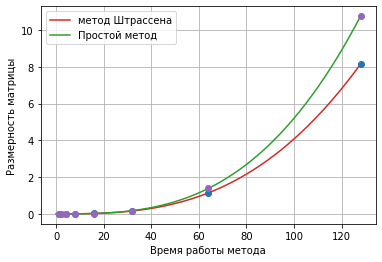

In [5]:
fs = np.polyfit(por,timeStrassen,4)
fd = np.polyfit(por,timeUsual,4)
xx = np.linspace(0,2**(por.shape[0]-1),500)  
uu = np.linspace(0,2**(por.shape[0]-1),500)
yyS = np.polyval(fs, xx)
yyD = np.polyval(fd, uu)   
plt.plot(xx, yyS, color = 'tab:red',label='метод Штрассена')
plt.plot(uu, yyD, color = 'tab:green',label='Простой метод')
plt.plot(por, timeStrassen ,'o', color = 'tab:blue')
plt.plot(por, timeUsual,'o', color = 'tab:purple')
plt.xlabel('Время работы метода')
plt.ylabel('Размерность матрицы')
plt.grid()
plt.legend()

На этом графике мы видим что простой метод умножения уступает методу штрассена, но только на больших размерах матрицы

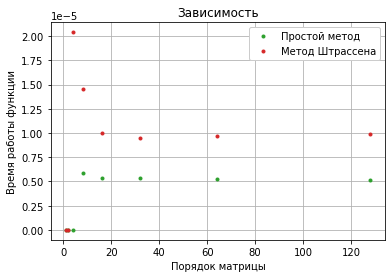

In [6]:
timeStrassen2 = []
timeUsual2 = []
for i in range (0,len(timeUsual)):
    timeStrassen2.append(timeStrassen[i]/(por[i]**(math.log2(7))))
    timeUsual2.append(timeUsual[i]/(por[i]**3))
plt.plot(por, timeUsual2 , '.', label ='Простой метод',color = 'tab:green')
plt.plot(por, timeStrassen2 , '.', label ='Метод Штрассена',color = 'tab:red')
plt.legend(loc = 'best', framealpha = 1)
plt.xlabel("Порядок матрицы")
plt.ylabel("Время работы функции")
plt.title("Зависимость")
pass

plt.grid()

Поделив время выполнения простого метода на $n^3$ и метода Штрассена на $n^{log_2 7}$, мы увидим что на графике что отношение времени выполнения программы к её сложности имеет предел. Исходя из этого метод Штрассена растёт по $n^{log_2 7}$, а простой метод по $n^3$

# Вывод
Из данной программы мы можем наблюдать значительную эффективность метода штрассена при работе с большими матрицами размером $2^n$. Однако, можно усовершенствовать метод штрассена, добавив условие применения данного метода только при использовании больших матриц, и использовать простой метод умножения для небольших матриц.